<a href="https://colab.research.google.com/github/rahiakela/mathematics-for-machine-learning/blob/main/practical-linear-algebra-for-data-science/12-least-squares-applications/01_predicting_bike_rentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Predicting Bike Rentals

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

##Dataset

In [4]:
# Data citation: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand
#                prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020
# data source website: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
data = pd.read_csv(url, sep=",", encoding="unicode_escape")

# let's have a look
print(data.shape)
data.head()

(8760, 14)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


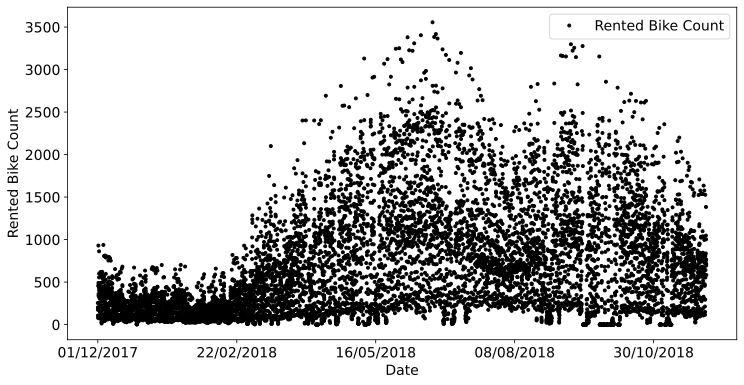

In [5]:
# let's show some data in scatter plots
data.plot(x='Date',y='Rented Bike Count',color='k',marker='.',linestyle='none', figsize=(12,6),ylabel='Rented Bike Count')
plt.savefig('Figure_12_1a.png',dpi=300)
plt.show()

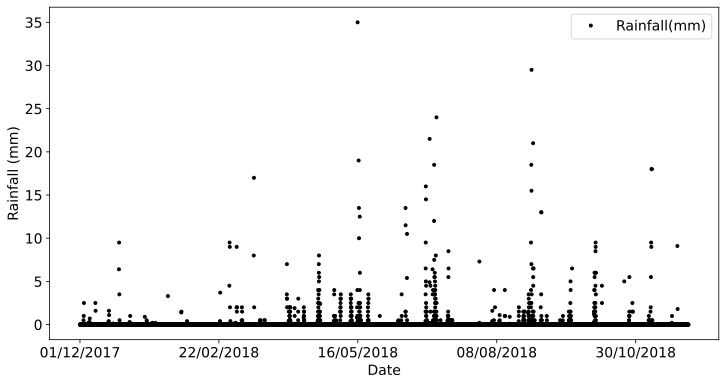

In [6]:
data.plot(x='Date',y='Rainfall(mm)',color='k', marker='.',linestyle='none', figsize=(12,6), ylabel='Rainfall (mm)');
plt.savefig('Figure_12_1b.png',dpi=300)
plt.show()

In [7]:
# Examine the correlation matrix
data.corr()

<ipython-input-7-4dd971cc914d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


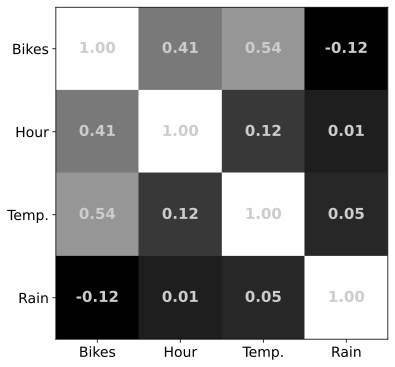

In [8]:
# let's show the correlation matrix in an image

# only using a few columns
columns2use = ['Rented Bike Count','Hour','Temperature(°C)','Rainfall(mm)']
colsshort = ['Bikes','Hour','Temp.','Rain'] # for axis labeleing

# re-compute the correlation matrix
R = data[columns2use].corr()

# draw the image
plt.figure(figsize=(6,6))
plt.imshow(R.values,cmap='gray')
plt.xticks(range(4),labels=colsshort)
plt.yticks(range(4),labels=colsshort)

# text labels
for (j,i),num in np.ndenumerate(R.values):
  plt.text(i,j,f'{num:.2f}',color=[.8,.8,.8],ha='center',va='center',fontweight='bold',fontsize=15)

plt.savefig('Figure_12_02.png',dpi=300)
plt.show()

In [9]:
# let's binarize the seasons
data.replace(["Spring", "Summer", "Autumn", "Winter"], [1, 1, 0, 0], inplace=True)
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,No Holiday,Yes


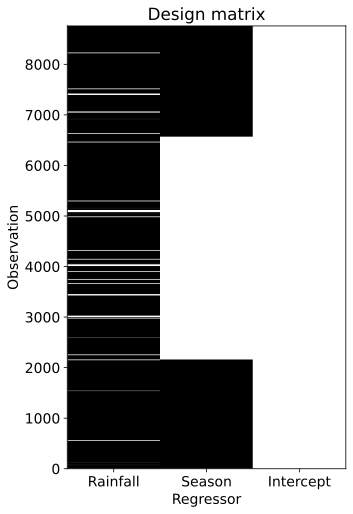

In [10]:
# Create a design matrix
design_mat = data[["Rainfall(mm)", "Seasons"]].to_numpy()

# add an intercept
design_mat = np.append(design_mat, np.ones((design_mat.shape[0], 1)), axis=1)

# extract DV
y = data[["Rented Bike Count"]].to_numpy()

# visualize the design matrix
plt.figure(figsize=(5,8))
plt.imshow(design_mat, aspect='auto', vmin=0, vmax=1, origin='lower', interpolation='nearest', cmap='gray')
plt.ylabel('Observation')
plt.xlabel('Regressor')
plt.title('Design matrix')
plt.xticks(range(3), labels=['Rainfall','Season','Intercept'])
plt.savefig('Figure_12_3a.png',dpi=300)
plt.show()

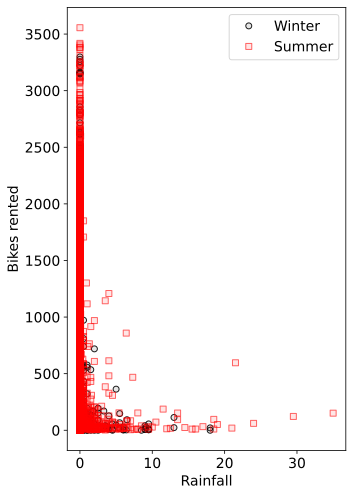

In [11]:
# plot the data
plt.figure(figsize=(5,8))

# separately for autumn/winter and spring/summer
plt.plot(design_mat[design_mat[:,1]==0,0], y[design_mat[:,1]==0],'o',markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(design_mat[design_mat[:,1]==1,0], y[design_mat[:,1]==1],'s',markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')

plt.xlabel('Rainfall')
plt.ylabel('Bikes rented')
plt.legend()
plt.savefig('Figure_12_3b.png',dpi=300)
plt.show()

##Least squares